# Upload df

In [1]:
import pandas as pd

one_hot_encoded_df2 = pd.read_csv('data/model/actReading_11.csv')

In [2]:
# Dropping the continuous label and ID label
one_hot_encoded_df2 = one_hot_encoded_df2.drop(columns=['studentId', 'proficient_diff', 'proficient_score'])


In [3]:
one_hot_encoded_df2.head()

,is_proficient,course_ACT Review,course_ACT/WK Rev.,course_ACTReview.5C,course_AG Communica,course_AIDE-ELEM,course_AIDE-LIB,course_ALG I B ACCE,course_ALIITRIGH/A,course_ARMY LET I,...,course_YearbkII9-12,course_Yearbook9-12,course_YrbkIII9-12,school_High School A,school_High School B,school_High School C,school_High School D,iready_math,iready_reading,bbb_literacy
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,0,0,0
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,0,0,0
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,0
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,0
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,0


In [4]:
one_hot_encoded_df2.columns.tolist()

['is_proficient',
 'course_ACT Review',
 'course_ACT/WK Rev.',
 'course_ACTReview.5C',
 'course_AG Communica',
 'course_AIDE-ELEM',
 'course_AIDE-LIB',
 'course_ALG I B ACCE',
 'course_ALIITRIGH/A',
 'course_ARMY LET I',
 'course_ARMY LET II',
 'course_ARMY LET III',
 'course_ARMY LET IV',
 'course_ARMYLETIVACT',
 'course_AcAdv.Baseba',
 'course_AcAdv.Basket',
 'course_AcAdv.CrossC',
 'course_AcAdv.Footb',
 'course_AcAdv.Softba',
 'course_AcAdv.Volley',
 'course_Accounting',
 'course_Adv BTA',
 'course_Advanced Agr',
 'course_Agriscience',
 'course_Alg Esntls B',
 'course_Alg II/Trig',
 'course_AlgEnrichmet',
 'course_AlgII/TrigAC',
 'course_Algebra I',
 'course_Algebra I A',
 'course_Algebra I B',
 'course_Algebra II',
 'course_AlgebraicCon',
 'course_Anat/Physio',
 'course_Anthropology',
 'course_Art App',
 'course_BAND MARCH',
 'course_BANDCONCERT',
 'course_BANDMARCHAUX',
 'course_BIOLOGY ADV',
 'course_Bak & Pstr A',
 'course_BandConcer.5',
 'course_BandConcer1C',
 'course_BandMar

## PCA

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(one_hot_encoded_df2.drop(columns=['is_proficient']))

In [6]:
from sklearn.decomposition import PCA

pca = PCA()  # Initialize PCA without specifying components
pca.fit(X_scaled)

# Explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_sum = 0
components = 0

for variance in explained_variance_ratio:
    cumulative_sum += variance
    components += 1
    if cumulative_sum >= 0.80:  # Adjust to your threshold (80%)
        break

print(f"Number of components needed: {components}")
print(f"Cumulative explained variance: {cumulative_sum}")

Number of components needed: 108
Cumulative explained variance: 0.8031976486267409


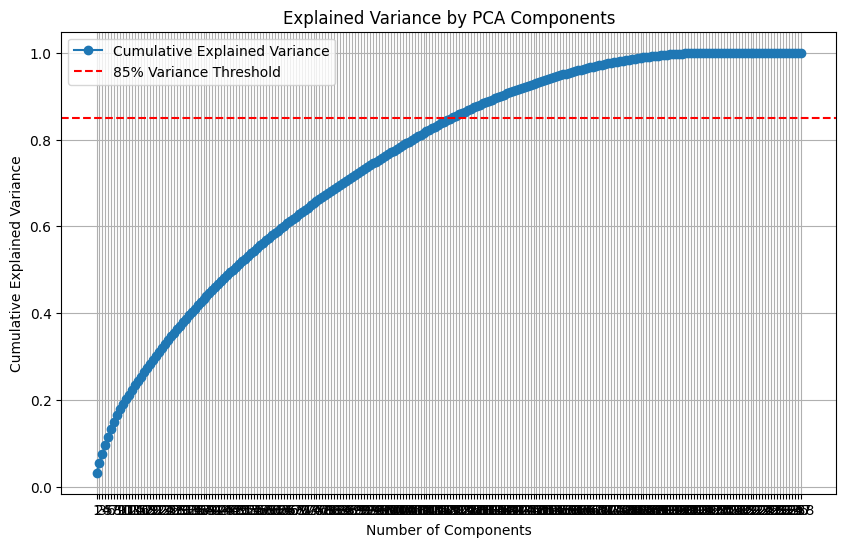

Number of components needed: 108


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()  # Initialize PCA without specifying components
pca.fit(X_scaled)

# Explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', label='Cumulative Explained Variance')
plt.axhline(y=0.80, color='r', linestyle='--', label='85% Variance Threshold')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend()
plt.grid()
plt.show()

# Calculate the number of components needed to explain at least 80% variance
components = np.argmax(cumulative_variance >= 0.80) + 1  # Add 1 to get the count of components
print(f"Number of components needed: {components}")


In [8]:
X_pca = pca.transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

In [9]:
first_108_pcs_df = X_pca_df.iloc[:, :108].copy()

In [10]:
first_108_pcs_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108
0,0.110937,1.638292,24.112886,4.566716,-5.905436,-1.349250,3.578944,0.983968,-1.181895,8.522364,...,0.114371,0.254416,0.094873,-0.482036,-0.542497,0.120446,-0.432339,0.934933,0.098480,-0.735793
1,0.110937,1.638292,24.112886,4.566716,-5.905436,-1.349250,3.578944,0.983968,-1.181895,8.522364,...,0.114371,0.254416,0.094873,-0.482036,-0.542497,0.120446,-0.432339,0.934933,0.098480,-0.735793
2,0.239009,-0.621229,0.684855,-0.534362,0.898897,-0.404811,-0.942524,-1.987721,-1.188951,-0.088060,...,-0.027845,0.004684,0.002129,0.003784,0.026517,-0.032444,0.024476,0.010627,-0.018400,0.033267
3,0.239009,-0.621229,0.684855,-0.534362,0.898897,-0.404811,-0.942524,-1.987721,-1.188951,-0.088060,...,-0.027845,0.004684,0.002129,0.003784,0.026517,-0.032444,0.024476,0.010627,-0.018400,0.033267
4,0.239009,-0.621229,0.684855,-0.534362,0.898897,-0.404811,-0.942524,-1.987721,-1.188951,-0.088060,...,-0.027845,0.004684,0.002129,0.003784,0.026517,-0.032444,0.024476,0.010627,-0.018400,0.033267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,0.278231,-0.779888,0.890313,-0.702643,1.236055,-0.559061,-1.334703,-3.005750,-1.924258,-0.163495,...,-0.000267,0.000130,0.000065,0.000158,0.001174,-0.001959,0.002060,0.001025,-0.001862,0.003682
3831,0.321641,-0.960680,1.127349,-0.897546,1.632317,-0.740599,-1.799840,-4.236165,-2.828768,-0.259164,...,0.058978,-0.009750,-0.004419,-0.007773,-0.054332,0.065451,-0.048251,-0.020700,0.035675,-0.063902
3832,0.321641,-0.960680,1.127349,-0.897546,1.632317,-0.740599,-1.799840,-4.236165,-2.828768,-0.259164,...,0.058978,-0.009750,-0.004419,-0.007773,-0.054332,0.065451,-0.048251,-0.020700,0.035675,-0.063902
3833,0.321641,-0.960680,1.127349,-0.897546,1.632317,-0.740599,-1.799840,-4.236165,-2.828768,-0.259164,...,0.058978,-0.009750,-0.004419,-0.007773,-0.054332,0.065451,-0.048251,-0.020700,0.035675,-0.063902


In [11]:

# Get the PCA components (loadings)
components = pca.components_[:108]  # First 18 principal components

# Create a DataFrame for feature loadings
feature_loadings_df = pd.DataFrame(components.T, columns=[f'PC{i+1}' for i in range(components.shape[0])],
                                    index = one_hot_encoded_df2.drop(columns=['is_proficient']).columns)

# Find the most important features for each principal component
top_features = {}

for pc in feature_loadings_df.columns:
    # Get the absolute values of the loadings and sort them
    sorted_features = feature_loadings_df[pc].abs().sort_values(ascending=False)
    # Select the top 5 features (you can adjust this number)
    top_features[pc] = sorted_features.head(5).index.tolist()

# Display the top features for each principal component
for pc, features in top_features.items():
    print(f'Top features for {pc}: {features}')

Top features for PC1: ['course_HEALTH 9-12', 'course_DRIVERS ED', 'course_D&TSafetyEd', 'school_High School B', 'course_Health 9-12']
Top features for PC2: ['course_Physical Sci', 'course_English Gr10', 'course_Algebra I B', 'course_Eng Gr10 Adv', 'course_ChemistryAdv']
Top features for PC3: ['course_Ess II:USHis', 'course_Ess: Phy Sci', 'course_Eng Ess 10', 'course_Alg Esntls B', 'course_RdIntrv7-12']
Top features for PC4: ['school_High School B', 'course_BullBogAdv', 'school_High School A', 'course_Panther Adv', 'course_HISTUS1877AC']
Top features for PC5: ['course_PhySciACCESS', 'course_EnglGr10ACCE', 'course_HealthACCESS', 'course_Ess: E & SS', 'course_TranSer 11']
Top features for PC6: ['course_Ess: E & SS', 'course_TranSer 11', 'course_Eng Ess 11', 'course_EssIII:USHis', 'course_Geo Ess']
Top features for PC7: ['course_PhySciACCESS', 'course_EnglGr10ACCE', 'course_HealthACCESS', 'course_USHisIG10ACC', 'course_AlgII/TrigAC']
Top features for PC8: ['school_High School D', 'course_E

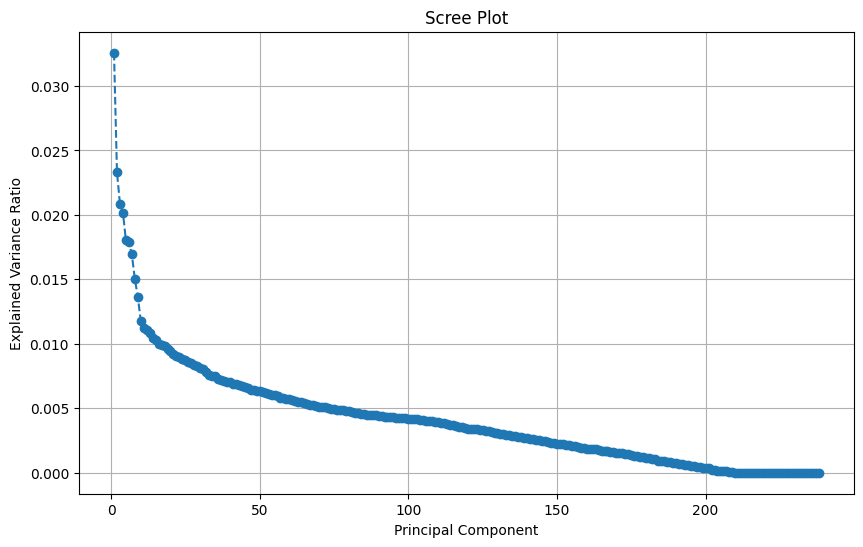

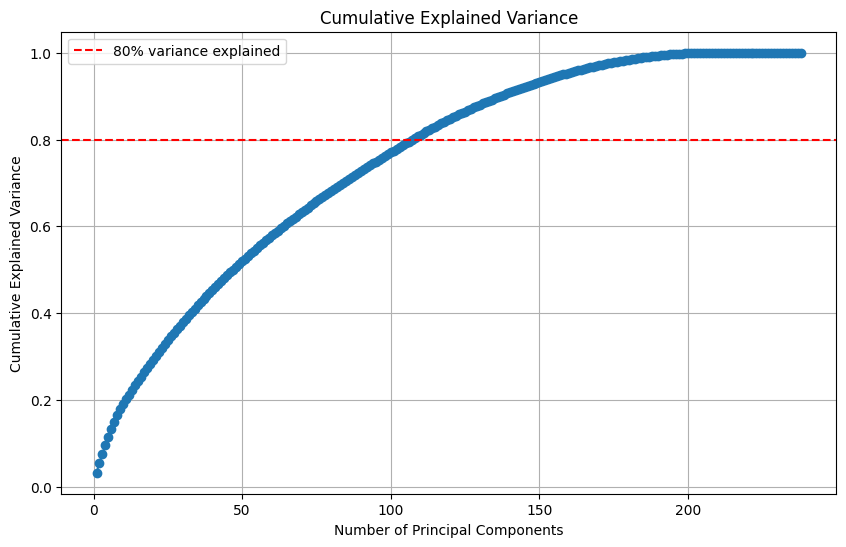

In [12]:

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Cumulative Explained Variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% variance explained')  # Adjust threshold as needed
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = first_108_pcs_df  # PCA-transformed features
y = one_hot_encoded_df2['is_proficient']  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
first_108_pcs_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108
0,0.110937,1.638292,24.112886,4.566716,-5.905436,-1.349250,3.578944,0.983968,-1.181895,8.522364,...,0.114371,0.254416,0.094873,-0.482036,-0.542497,0.120446,-0.432339,0.934933,0.098480,-0.735793
1,0.110937,1.638292,24.112886,4.566716,-5.905436,-1.349250,3.578944,0.983968,-1.181895,8.522364,...,0.114371,0.254416,0.094873,-0.482036,-0.542497,0.120446,-0.432339,0.934933,0.098480,-0.735793
2,0.239009,-0.621229,0.684855,-0.534362,0.898897,-0.404811,-0.942524,-1.987721,-1.188951,-0.088060,...,-0.027845,0.004684,0.002129,0.003784,0.026517,-0.032444,0.024476,0.010627,-0.018400,0.033267
3,0.239009,-0.621229,0.684855,-0.534362,0.898897,-0.404811,-0.942524,-1.987721,-1.188951,-0.088060,...,-0.027845,0.004684,0.002129,0.003784,0.026517,-0.032444,0.024476,0.010627,-0.018400,0.033267
4,0.239009,-0.621229,0.684855,-0.534362,0.898897,-0.404811,-0.942524,-1.987721,-1.188951,-0.088060,...,-0.027845,0.004684,0.002129,0.003784,0.026517,-0.032444,0.024476,0.010627,-0.018400,0.033267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,0.278231,-0.779888,0.890313,-0.702643,1.236055,-0.559061,-1.334703,-3.005750,-1.924258,-0.163495,...,-0.000267,0.000130,0.000065,0.000158,0.001174,-0.001959,0.002060,0.001025,-0.001862,0.003682
3831,0.321641,-0.960680,1.127349,-0.897546,1.632317,-0.740599,-1.799840,-4.236165,-2.828768,-0.259164,...,0.058978,-0.009750,-0.004419,-0.007773,-0.054332,0.065451,-0.048251,-0.020700,0.035675,-0.063902
3832,0.321641,-0.960680,1.127349,-0.897546,1.632317,-0.740599,-1.799840,-4.236165,-2.828768,-0.259164,...,0.058978,-0.009750,-0.004419,-0.007773,-0.054332,0.065451,-0.048251,-0.020700,0.035675,-0.063902
3833,0.321641,-0.960680,1.127349,-0.897546,1.632317,-0.740599,-1.799840,-4.236165,-2.828768,-0.259164,...,0.058978,-0.009750,-0.004419,-0.007773,-0.054332,0.065451,-0.048251,-0.020700,0.035675,-0.063902


## final catboost binary model

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6720129	test: 0.6726037	best: 0.6726037 (0)	total: 161ms	remaining: 1m 20s
50:	learn: 0.4435309	test: 0.4699009	best: 0.4699009 (50)	total: 854ms	remaining: 7.52s
100:	learn: 0.3766038	test: 0.4124299	best: 0.4124299 (100)	total: 1.57s	remaining: 6.21s
150:	learn: 0.3430403	test: 0.3823481	best: 0.3823481 (150)	total: 2.27s	remaining: 5.24s
200:	learn: 0.3291507	test: 0.3697220	best: 0.3697220 (200)	total: 2.97s	remaining: 4.42s
250:	learn: 0.3225317	test: 0.3623677	best: 0.3623677 (250)	total: 3.67s	remaining: 3.65s
300:	learn: 0.3186261	test: 0.3593083	best: 0.3593083 (300)	total: 4.39s	remaining: 2.9s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.3582465938
bestIteration = 325

Shrink model to first 326 iterations.
Confusion Matrix:
[[352  49]
 [125 241]]
Accuracy: 0.77
Macro F1 Score: 0.77

Classification Report:
              precision    recall  f1-score   support

       False       0.74      0.88      0.80       401
        True       0.83     

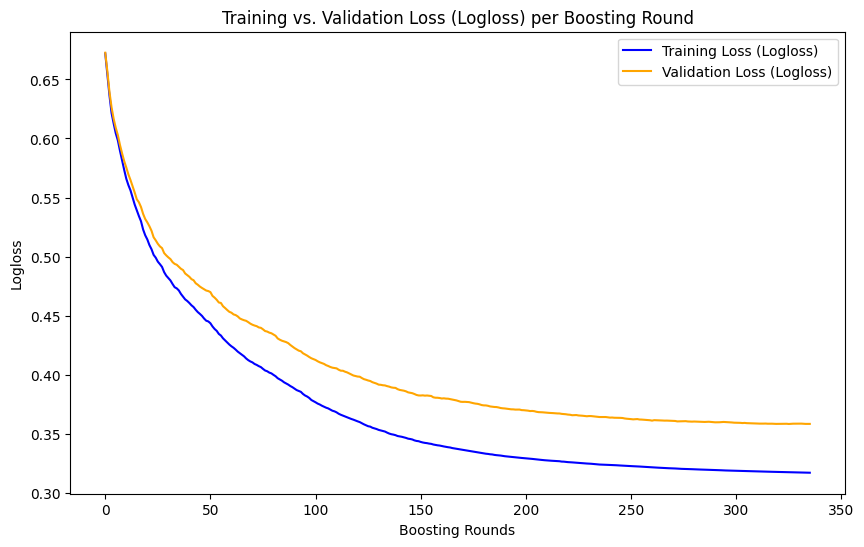

In [15]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

# Identify Categorical Features
categorical_features_indices = [X.columns.get_loc(col) for col in X.select_dtypes(include=['object', 'category']).columns]

# Prepare the CatBoost data pools
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
validation_pool = Pool(X_test, y_test, cat_features=categorical_features_indices)

# Train the CatBoost Model for Binary Classification
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    verbose=50,
    random_seed=42,
    cat_features=categorical_features_indices,
    eval_metric='Logloss',  # Use Logloss for binary classification
)

# Fit the model with early stopping
model.fit(
    train_pool,
    eval_set=validation_pool,
    use_best_model=True,
    plot=True,
    early_stopping_rounds=10  # Enable early stopping
)

# Make probability predictions and convert to binary class predictions
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
y_pred = (y_pred_prob > 0.5).astype(int)  # Threshold at 0.5

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Macro F1 Score
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Macro F1 Score: {macro_f1:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot training vs. validation loss
eval_history = model.get_evals_result()
train_loss = eval_history['learn']['Logloss']
validation_loss = eval_history['validation']['Logloss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss (Logloss)', color='blue')
plt.plot(validation_loss, label='Validation Loss (Logloss)', color='orange')
plt.xlabel('Boosting Rounds')
plt.ylabel('Logloss')
plt.title('Training vs. Validation Loss (Logloss) per Boosting Round')
plt.legend()
plt.show()


## Binary XGBoost model

Cross-Validated Accuracy: 0.75
[0]	train-logloss:0.66208	eval-logloss:0.66621
[1]	train-logloss:0.63568	eval-logloss:0.64077
[2]	train-logloss:0.61326	eval-logloss:0.62052
[3]	train-logloss:0.59275	eval-logloss:0.60096
[4]	train-logloss:0.57465	eval-logloss:0.58472
[5]	train-logloss:0.55765	eval-logloss:0.56827
[6]	train-logloss:0.54457	eval-logloss:0.55577
[7]	train-logloss:0.53186	eval-logloss:0.54408
[8]	train-logloss:0.52170	eval-logloss:0.53368
[9]	train-logloss:0.50872	eval-logloss:0.52035
[10]	train-logloss:0.49681	eval-logloss:0.51005
[11]	train-logloss:0.48649	eval-logloss:0.50115
[12]	train-logloss:0.47576	eval-logloss:0.49109
[13]	train-logloss:0.46847	eval-logloss:0.48458
[14]	train-logloss:0.46104	eval-logloss:0.47677
[15]	train-logloss:0.45270	eval-logloss:0.47021
[16]	train-logloss:0.44674	eval-logloss:0.46613
[17]	train-logloss:0.44054	eval-logloss:0.46143
[18]	train-logloss:0.43439	eval-logloss:0.45522
[19]	train-logloss:0.42883	eval-logloss:0.44988
[20]	train-logloss:

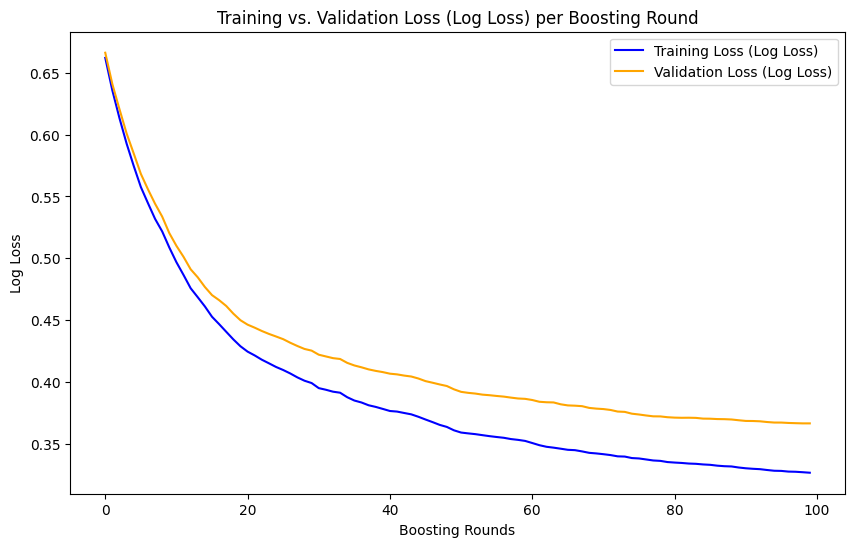

Accuracy: 0.77
Macro F1 Score: 0.77
Confusion Matrix:
[[350  51]
 [125 241]]


In [18]:
from xgboost import XGBClassifier, DMatrix, train
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize the XGBClassifier with additional regularization and reduced complexity
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,       # Reduced depth to limit complexity
    reg_alpha=0.1,     # L1 regularization
    reg_lambda=0.1,    # L2 regularization
    random_state=42
)

# Run cross-validation to estimate the model's performance
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')  # Scoring set to 'accuracy'
mean_cv_accuracy = cv_scores.mean()
print(f"Cross-Validated Accuracy: {mean_cv_accuracy:.2f}")

# Prepare data in DMatrix format for training with early stopping
dtrain = DMatrix(X_train, label=y_train)
dtest = DMatrix(X_test, label=y_test)

# Parameters for the XGBoost model
params = {
    'max_depth': 6,
    'learning_rate': 0.1,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'objective': 'binary:logistic',  # Binary classification objective
    'random_state': 42
}

# Update evals list to include both training and validation sets
evals = [(dtrain, 'train'), (dtest, 'eval')]

# Train the XGBoost model with early stopping
evals_result = {}
xgb_model_trained = train(
    params,
    dtrain,
    num_boost_round=100,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=True,
    evals_result=evals_result
)

# Extract training and validation losses from evals_result
train_loss = evals_result['train']['logloss']
validation_loss = evals_result['eval']['logloss']

# Plotting the losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss (Log Loss)', color='blue')
plt.plot(validation_loss, label='Validation Loss (Log Loss)', color='orange')
plt.xlabel('Boosting Rounds')
plt.ylabel('Log Loss')
plt.title('Training vs. Validation Loss (Log Loss) per Boosting Round')
plt.legend()
plt.show()

# Make predictions on the test set
xgb_y_pred_prob = xgb_model_trained.predict(dtest)
xgb_y_pred = (xgb_y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, xgb_y_pred)
macro_f1 = f1_score(y_test, xgb_y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, xgb_y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Macro F1 Score: {macro_f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


In [19]:
# Extract values from the confusion matrix
n1, n2 = conf_matrix[0]  # TN, FP
n3, n4 = conf_matrix[1]  # FN, TP

# Calculate metrics
precision = n4 / (n4 + n2) if (n4 + n2) != 0 else 0  # Avoid division by zero
tpr = n4 / (n4 + n3) if (n4 + n3) != 0 else 0        # Sensitivity (Recall)
tnr = n1 / (n1 + n2) if (n1 + n2) != 0 else 0        # Specificity

print(f"Precision: {precision:.4f}")
print(f"True Positive Rate (TPR/Sensitivity): {tpr:.4f}")
print(f"True Negative Rate (TNR/Specificity): {tnr:.4f}")

Precision: 0.8253
True Positive Rate (TPR/Sensitivity): 0.6585
True Negative Rate (TNR/Specificity): 0.8728


In [20]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Macro F1 Score: {macro_f1:.2f}")

Accuracy: 0.77
Macro F1 Score: 0.77


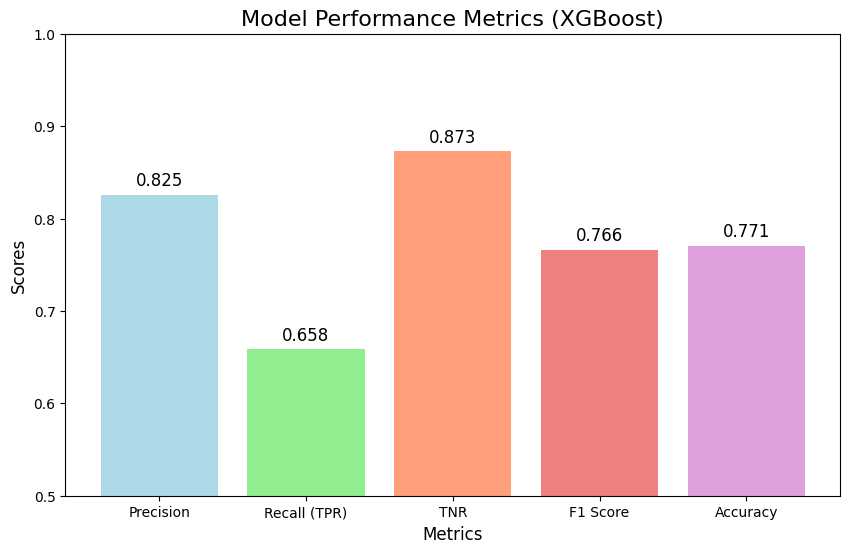

In [21]:


# Metrics and their corresponding values
metrics = ['Precision', 'Recall (TPR)', 'TNR', 'F1 Score', 'Accuracy']
values = [precision, tpr, tnr, macro_f1, accuracy]

colors = ['lightblue', 'lightgreen', 'lightsalmon', 'lightcoral', 'plum']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=colors)

# Adding title and labels
plt.title('Model Performance Metrics (XGBoost)', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Scores', fontsize=12)

# Setting y-axis limits from 0.5 to 1
plt.ylim(0.5, 1)

# Display the values on top of the bars
for i in range(len(values)):
    plt.text(i, values[i] + 0.01, f'{values[i]:.3f}', ha='center', fontsize=12)

plt.show()


## XGBoost with outlier detection

In [22]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN  # Import DBSCAN
from sklearn.ensemble import IsolationForest  # Import Isolation Forest
import numpy as np

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------
# DBSCAN for Outlier Detection
# -----------------
print("Detecting outliers using DBSCAN...")
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can adjust the `eps` and `min_samples` parameters
dbscan_train_labels = dbscan.fit_predict(X_train_scaled)  # -1 for outliers
dbscan_test_labels = dbscan.fit_predict(X_test_scaled)

# Add DBSCAN labels as features (1 for inliers, 0 for outliers)
X_train_dbscan = np.hstack([X_train_scaled, (dbscan_train_labels != -1).astype(int).reshape(-1, 1)])
X_test_dbscan = np.hstack([X_test_scaled, (dbscan_test_labels != -1).astype(int).reshape(-1, 1)])

# -----------------
# Isolation Forest for Outlier Detection
# -----------------
print("Detecting outliers using Isolation Forest...")
isolation_forest = IsolationForest(n_estimators=100, contamination=0.25, random_state=42)
isolation_train_labels = isolation_forest.fit_predict(X_train_scaled)  # 1 for inliers, -1 for outliers
isolation_test_labels = isolation_forest.predict(X_test_scaled)  # 1 for inliers, -1 for outliers

# Add Isolation Forest labels as features (1 for inliers, 0 for outliers)
X_train_isolation = np.hstack([X_train_scaled, (isolation_train_labels == 1).astype(int).reshape(-1, 1)])
X_test_isolation = np.hstack([X_test_scaled, (isolation_test_labels == 1).astype(int).reshape(-1, 1)])

# -----------------
# Train XGBClassifier with DBSCAN and Isolation Forest features
# -----------------
print("Training XGBoost with DBSCAN and Isolation Forest features...")

# Combine DBSCAN and Isolation Forest features
X_train_combined = np.hstack([X_train_dbscan, (isolation_train_labels == 1).astype(int).reshape(-1, 1)])
X_test_combined = np.hstack([X_test_dbscan, (isolation_test_labels == 1).astype(int).reshape(-1, 1)])

# Create XGBClassifier model
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)

# Run cross-validation to estimate the model's performance
cv_scores = cross_val_score(xgb_model, X_train_combined, y_train, cv=5, scoring='accuracy')  # Scoring set to 'accuracy'
mean_cv_accuracy = cv_scores.mean()
print(f"Cross-Validated Accuracy with DBSCAN and Isolation Forest: {mean_cv_accuracy:.2f}")

# Train and evaluate the model
xgb_model.fit(X_train_combined, y_train)
y_pred = xgb_model.predict(X_test_combined)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
macro_f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy with DBSCAN and Isolation Forest: {accuracy:.2f}")
print(f"Macro F1 Score with DBSCAN and Isolation Forest: {macro_f1:.2f}")
print("Confusion Matrix with DBSCAN and Isolation Forest:")
print(conf_matrix)


Detecting outliers using DBSCAN...
Detecting outliers using Isolation Forest...
Training XGBoost with DBSCAN and Isolation Forest features...
Cross-Validated Accuracy with DBSCAN and Isolation Forest: 0.75
Accuracy with DBSCAN and Isolation Forest: 0.77
Macro F1 Score with DBSCAN and Isolation Forest: 0.77
Confusion Matrix with DBSCAN and Isolation Forest:
[[354  47]
 [126 240]]


In [23]:
# Extract values from the confusion matrix
n1, n2 = conf_matrix[0]  # TN, FP
n3, n4 = conf_matrix[1]  # FN, TP

# Calculate metrics
precision = n4 / (n4 + n2) if (n4 + n2) != 0 else 0  # Avoid division by zero
tpr = n4 / (n4 + n3) if (n4 + n3) != 0 else 0        # Sensitivity (Recall)
tnr = n1 / (n1 + n2) if (n1 + n2) != 0 else 0        # Specificity

print(f"Precision: {precision:.4f}")
print(f"True Positive Rate (TPR/Sensitivity): {tpr:.4f}")
print(f"True Negative Rate (TNR/Specificity): {tnr:.4f}")

Precision: 0.8362
True Positive Rate (TPR/Sensitivity): 0.6557
True Negative Rate (TNR/Specificity): 0.8828


In [25]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Macro F1 Score: {macro_f1:.2f}")

Accuracy: 0.77
Macro F1 Score: 0.77


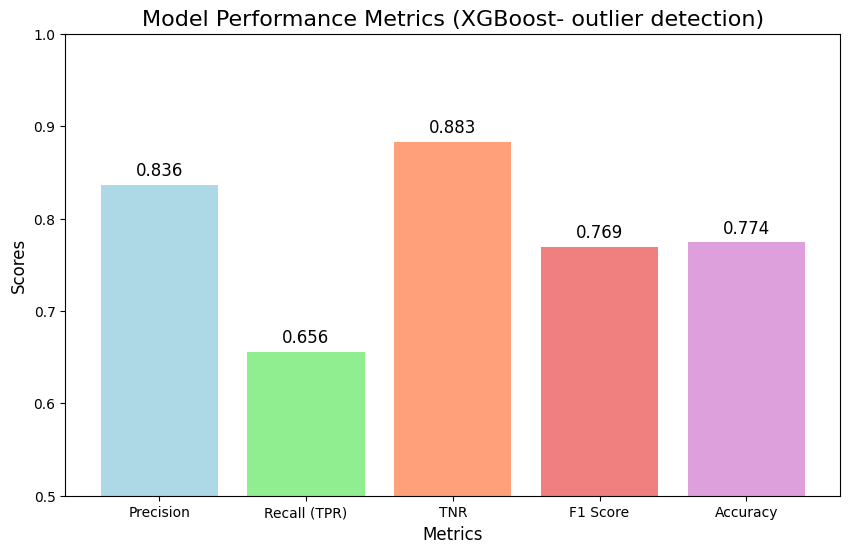

In [26]:


# Metrics and their corresponding values
metrics = ['Precision', 'Recall (TPR)', 'TNR', 'F1 Score', 'Accuracy']
values = [precision, tpr, tnr, macro_f1, accuracy]

colors = ['lightblue', 'lightgreen', 'lightsalmon', 'lightcoral', 'plum']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=colors)

# Adding title and labels
plt.title('Model Performance Metrics (XGBoost- outlier detection)', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Scores', fontsize=12)

# Setting y-axis limits from 0.5 to 1
plt.ylim(0.5, 1)

# Display the values on top of the bars
for i in range(len(values)):
    plt.text(i, values[i] + 0.01, f'{values[i]:.3f}', ha='center', fontsize=12)

plt.show()
